# Machine Learning Tutorial

### Prerequisite
In case you are planning to use your laptop, please install the following libraries using pip or conda or your favorite environment manager

In [2]:
# #uncomment this section
# !pip install xgboost
# !pip install pandas
# !pip install numpy
# !pip install -U scikit-learn
# !pip install shap 
# #or !conda install -c conda-forge shap


## Introduction (10 mins)
The goal of this tutorial is to ensure that learners achieve:

    1.) Manipulating input data to pandas and check the sanity of the data
    2.) Identify the sample and target variables in the dataset
    3.) Split the data for training and testing
    4.) Conduct cross-validation studies
    5.) Train a model
    6.) Analyze the results
    7.) Visualize the results using SHAP
    
 We will discuss the two models that we will use to learn how to fit data.

 The first model has 49 features while the second model has 256 features

# A bit of Background
Avian Influenza (AI) outbreaks are on an increasing trajectory. 
This disease carries a substantial economic burden, resulting in considerable losses to farmers 
with profound impacts on economies. As the outbreaks continue in birds and other unusual host species, further virus evolution and spillover to humans’ risk is anticipated to grow and potentially evolve into new pandemics. Despite this, the underlying drivers of the outbreaks remain elusive. We develop machine learning models capable of predicting AI events in Europe dynamically uncovering the critical determinants of their onset. 

## 1.) Manipulating input data to pandas and check the sanity of the data (10 mins)
We will learn how to put together climate data, socio-demographic data, and infectious disease outcome data

For this purpose, we will use 

    1.) climate_data.xlsx/.csv
    2.) environment_data.xlsx/.csv
    3.) bioclima_data.xlsx
    4.) socio_demo_data.xslsx/.csv
    5.) trade_data.xslsx/.csv
    6.) label_data.xlsx/.csv



## 2.) Identify the sample and target variables in the dataset (10 mins)

Basically putting everything together. Please change the paths accordingly. 

We have to manually join these files due to duplicate rows. An attempt to join programatically will fail!!

Please use the provided files to create a merged file. This file should contain data for the years 2006 to 2021. 

In [6]:
#Import all necessary libraries
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from xgboost import cv
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from collections import Counter #Maybe you should consider installing this in case you don't have it
import os
import sys

In [3]:
##SMall Exercise
#Please write a small script that splits the data into train and test data sets
#The training data sets should be from the years 2006 to 2020
#The test and validation data sets should be for the years 2021


#merged_data = pd.read_excel("your_merged_file")

#train_df = 
#test_df = 

#save the files with the names 
#m1train.xlsx for training
#m1test.xlsx for test

## 3.) Split the data for training, validation, and testing (5mins)

In [ ]:
#Load Train and Test Excel files
train_df = pd.read_excel("m1train.xlsx")
test_df = pd.read_excel("m1test.xlsx")
X_train = train_df.iloc[:,3:-1] #Training
y_train = train_df.iloc[:,-1:]
#print("Training data\n", X_train)
#print("Training labels\n", y_train)

X_test = test_df.iloc[:,3:-1]
X_test_raw = test_df.iloc[:,3:-1]
y_test = test_df.iloc[:,-1:]
y_test_raw = test_df.iloc[:,-1:]

#print("Testing data\n", X_test)
#print("Testing labels\n", y_test)
#print("Raw Testing Testing data\n", y_test)
#print("Raw Testing labels\n", y_test_raw)
#sys.exit()

#Define the Validation_set
valid= train_df[train_df['Year'] == 2021]
dvalid_data = valid.iloc[:,3:-1]
dvalid_label = valid.iloc[:,-1:]
dvalid = xgb.DMatrix(dvalid_data, label=dvalid_label, missing=-999.0) #validation set
#print("Validation data\n", dvalid_data)
#print("Validation label\n", dvalid_label)
#sys.exit()
#First we have to convert these values to XgbDMatrix
#Training set
dtrain = xgb.DMatrix(X_train, label=y_train, missing=-999.0) # = xgb.DMatrix(y_train)
#Validation set
dtest = xgb.DMatrix(X_test, label=y_test, missing=-999.0) # = xgb.DMatrix(y_test)
#Test set
X_test = xgb.DMatrix(X_test)
y_test = xgb.DMatrix(y_test)

In [11]:
#Load Train and Test Excel files
train_df = pd.read_excel("m1train.xlsx")
test_df = pd.read_excel("m1test.xlsx")

In [12]:
train_df.head()

,Region,Year,label,max_temp_q1,max_temp_q2,max_temp_q3,max_temp_q4,min_temp_q1,min_temp_q2,min_temp_q3,...,bio14,bio15,bio16,bio17,bio18,bio19,lai_hv_q1,lai_hv_q2,lai_lv_q1,lai_lv_q2
0,AL011,2006.0,0,8.764677,19.652742,25.863468,21.958666,-4.446290,0.873629,11.876750,...,41.350000,38.252864,268.025003,142.800000,233.950005,197.350002,2.287059,2.673889,1.953705,2.393890
1,AL012,2006.0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,1.626709,1.946187,2.230774,2.757629
2,AL013,2006.0,0,6.686613,18.338387,24.337822,20.370749,-6.959274,-1.246935,10.288750,...,47.675001,34.143148,278.225005,154.775003,278.225005,185.975004,2.352651,2.796641,2.023529,2.498627
3,AL014,2006.0,0,11.325645,22.615564,29.519193,25.198666,-1.877661,3.236210,14.623416,...,23.225001,46.062316,300.750003,128.925004,217.650007,204.000003,2.207916,2.537811,2.124542,2.642120
4,AL015,2006.0,0,9.695419,21.285612,28.166128,23.695000,-3.737161,1.570129,13.280333,...,34.740001,40.372573,335.840001,159.300003,262.740005,223.020000,1.586046,2.007799,2.193115,2.683228


In [13]:
test_df.head()

,Region,Year,label,max_temp_q1,max_temp_q2,max_temp_q3,max_temp_q4,min_temp_q1,min_temp_q2,min_temp_q3,...,bio14,bio15,bio16,bio17,bio18,bio19,lai_hv_q1,lai_hv_q2,lai_lv_q1,lai_lv_q2
0,AT124,2021,0,5.124893,16.234161,25.198133,20.051733,-3.714419,-1.555742,11.885677,...,16.110000,77.399951,331.619998,62.240001,331.619998,106.480004,1.189178,1.897634,2.744842,3.011932
1,AT213,2021,0,6.337976,14.655161,24.397666,19.972388,-7.267043,-3.090860,10.938225,...,11.966667,62.418446,329.216676,70.566669,286.700009,146.183340,1.563833,2.432851,1.914978,1.988007
2,AT342,2021,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,2.253428,2.936584,1.702087,1.987396
3,BE233,2021,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,2.259450,2.301259,1.889923,2.200500
4,BE236,2021,0,9.277857,17.159677,24.240666,23.526666,1.315000,1.739000,12.732333,...,12.800000,49.117084,281.600003,113.300000,244.200004,241.100002,2.173513,2.241252,2.081177,2.417755


In [18]:
# check the length
print(f'Train Length: {len(train_df)}')
print(f'Train Length: {len(test_df)}')

Train Length: 37775
Train Length: 1201


In [63]:
# split

X_train = train_df.iloc[:,3:] #Training
y_train = train_df.iloc[:,2:3]

In [64]:
X_train.head(5)

,max_temp_q1,max_temp_q2,max_temp_q3,max_temp_q4,min_temp_q1,min_temp_q2,min_temp_q3,min_temp_q4,mean_temp_q1,mean_temp_q2,...,bio14,bio15,bio16,bio17,bio18,bio19,lai_hv_q1,lai_hv_q2,lai_lv_q1,lai_lv_q2
0,8.764677,19.652742,25.863468,21.958666,-4.446290,0.873629,11.876750,0.796667,1.160765,9.288901,...,41.350000,38.252864,268.025003,142.800000,233.950005,197.350002,2.287059,2.673889,1.953705,2.393890
1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,1.626709,1.946187,2.230774,2.757629
2,6.686613,18.338387,24.337822,20.370749,-6.959274,-1.246935,10.288750,-1.115750,-1.025591,7.677488,...,47.675001,34.143148,278.225005,154.775003,278.225005,185.975004,2.352651,2.796641,2.023529,2.498627
3,11.325645,22.615564,29.519193,25.198666,-1.877661,3.236210,14.623416,2.900833,3.766606,12.121535,...,23.225001,46.062316,300.750003,128.925004,217.650007,204.000003,2.207916,2.537811,2.124542,2.642120
4,9.695419,21.285612,28.166128,23.695000,-3.737161,1.570129,13.280333,1.275667,2.012005,10.570141,...,34.740001,40.372573,335.840001,159.300003,262.740005,223.020000,1.586046,2.007799,2.193115,2.683228


In [65]:
X_test = test_df.iloc[:,3:]
X_test_raw = test_df.iloc[:,3]
y_test = test_df.iloc[:,2:3]
y_test_raw = test_df.iloc[:,2:3]

In [66]:
X_test.head()

,max_temp_q1,max_temp_q2,max_temp_q3,max_temp_q4,min_temp_q1,min_temp_q2,min_temp_q3,min_temp_q4,mean_temp_q1,mean_temp_q2,...,bio14,bio15,bio16,bio17,bio18,bio19,lai_hv_q1,lai_hv_q2,lai_lv_q1,lai_lv_q2
0,5.124893,16.234161,25.198133,20.051733,-3.714419,-1.555742,11.885677,0.456233,0.159803,6.793495,...,16.110000,77.399951,331.619998,62.240001,331.619998,106.480004,1.189178,1.897634,2.744842,3.011932
1,6.337976,14.655161,24.397666,19.972388,-7.267043,-3.090860,10.938225,-0.251278,-1.648077,5.729104,...,11.966667,62.418446,329.216676,70.566669,286.700009,146.183340,1.563833,2.432851,1.914978,1.988007
2,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,2.253428,2.936584,1.702087,1.987396
3,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,2.259450,2.301259,1.889923,2.200500
4,9.277857,17.159677,24.240666,23.526666,1.315000,1.739000,12.732333,3.192000,4.956021,8.846864,...,12.800000,49.117084,281.600003,113.300000,244.200004,241.100002,2.173513,2.241252,2.081177,2.417755


In [67]:
y_test.head()

,label
0,0
1,0
2,0
3,0
4,0


In [50]:
# define the validation dataset
valid= train_df[train_df['Year'] == 2021]
dvalid_data = valid.iloc[:,3:]
dvalid_label = valid.iloc[:,2:3]

dvalid = xgb.DMatrix(dvalid_data, label=dvalid_label, missing=-999.0) #validation set

In [51]:
#training
dtrain = xgb.DMatrix(X_train, label=y_train, missing=-999.0) # = xgb.DMatrix(y_train)

In [52]:
#testing
dtest = xgb.DMatrix(X_test, label=y_test, missing=-999.0) # = xgb.DMatrix(y_test)

### Here we scale the data and define the parameters (5 mins)
Spend a little bit of time to discuss model tunning

Remember that our data is unbalanced (We have more 0s than 1s). So we have to scale the data to avoid bias

Then we need to define the parameters. Note that these are the already optimized parameters

In [53]:
#Get the labels and scale the data
label = dtrain.get_label()
ratio = float(np.sum(label == 0)) / np.sum(label == 1)
base_params = {
	'verbosity': 0,
	'booster': 'gbtree',
	'objective': 'binary:logistic',
        'scale_pos_weight' : ratio,
        'tree_method': 'hist',
        'eval_metrics': 'logloss'
}
params = {
          'learning_rate': 0.09963558437961703, 
          'num_boost_round': 191.58714451312179, 
          'max-depth': 4, 
          'gamma': 6.140489891496016e-05, 
          'subsample': 0.7329970919203579, 
          'reg_alpha': 1.5492015574694834e-05, 
          'reg_lambda': 0.002889192981174229, 
          'colsample_bytree': 0.7341652208091972, 
          'min_child_weight': 0, 
          'n_estimators': 443
          }

params.update(base_params)
print(params)

{'learning_rate': 0.09963558437961703, 'num_boost_round': 191.58714451312179, 'max-depth': 4, 'gamma': 6.140489891496016e-05, 'subsample': 0.7329970919203579, 'reg_alpha': 1.5492015574694834e-05, 'reg_lambda': 0.002889192981174229, 'colsample_bytree': 0.7341652208091972, 'min_child_weight': 0, 'n_estimators': 443, 'verbosity': 0, 'booster': 'gbtree', 'objective': 'binary:logistic', 'scale_pos_weight': 3.584901080228183, 'tree_method': 'hist', 'eval_metrics': 'logloss'}


## 4.) Conduct cross-validation studies (10 mins)

Participants may refer to a detailed explanation here: 
https://scikit-learn.org/stable/modules/cross_validation.html

Basically:
We use an approach, called k-fold CV, the training set is split into k smaller sets and then tested on the fly. 
<center>
    <img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="400">
</center>


[0]	train-logloss:0.64137+0.00188	test-logloss:0.64235+0.00193
[1]	train-logloss:0.59615+0.00153	test-logloss:0.59769+0.00180
[2]	train-logloss:0.55854+0.00209	test-logloss:0.56125+0.00227
[3]	train-logloss:0.52461+0.00256	test-logloss:0.52800+0.00260
[4]	train-logloss:0.49572+0.00239	test-logloss:0.50002+0.00270
[5]	train-logloss:0.46991+0.00190	test-logloss:0.47498+0.00205
[6]	train-logloss:0.44617+0.00245	test-logloss:0.45215+0.00272
[7]	train-logloss:0.42525+0.00256	test-logloss:0.43186+0.00229
[8]	train-logloss:0.40571+0.00249	test-logloss:0.41301+0.00225
[9]	train-logloss:0.38728+0.00263	test-logloss:0.39517+0.00248
[10]	train-logloss:0.37085+0.00268	test-logloss:0.37953+0.00220
[11]	train-logloss:0.35725+0.00265	test-logloss:0.36644+0.00203
[12]	train-logloss:0.34358+0.00225	test-logloss:0.35353+0.00206
[13]	train-logloss:0.33153+0.00215	test-logloss:0.34205+0.00254
[14]	train-logloss:0.32021+0.00232	test-logloss:0.33119+0.00283
[15]	train-logloss:0.31049+0.00255	test-logloss:0.

[128]	train-logloss:0.07084+0.00182	test-logloss:0.12145+0.00364
[129]	train-logloss:0.07017+0.00189	test-logloss:0.12112+0.00358
[130]	train-logloss:0.06972+0.00196	test-logloss:0.12085+0.00359
[131]	train-logloss:0.06913+0.00205	test-logloss:0.12053+0.00356
[132]	train-logloss:0.06852+0.00190	test-logloss:0.12015+0.00352
[133]	train-logloss:0.06789+0.00186	test-logloss:0.11977+0.00351
[134]	train-logloss:0.06741+0.00189	test-logloss:0.11956+0.00345
[135]	train-logloss:0.06670+0.00183	test-logloss:0.11914+0.00344
[136]	train-logloss:0.06622+0.00172	test-logloss:0.11888+0.00358
[137]	train-logloss:0.06572+0.00175	test-logloss:0.11854+0.00356
[138]	train-logloss:0.06532+0.00179	test-logloss:0.11842+0.00351
[139]	train-logloss:0.06487+0.00172	test-logloss:0.11814+0.00362
[140]	train-logloss:0.06436+0.00162	test-logloss:0.11786+0.00366
[141]	train-logloss:0.06383+0.00158	test-logloss:0.11756+0.00370
[142]	train-logloss:0.06324+0.00171	test-logloss:0.11732+0.00375
[143]	train-logloss:0.062

[255]	train-logloss:0.02740+0.00124	test-logloss:0.09956+0.00571
[256]	train-logloss:0.02722+0.00124	test-logloss:0.09949+0.00572
[257]	train-logloss:0.02700+0.00120	test-logloss:0.09938+0.00572
[258]	train-logloss:0.02677+0.00123	test-logloss:0.09926+0.00579
[259]	train-logloss:0.02654+0.00123	test-logloss:0.09910+0.00584
[260]	train-logloss:0.02635+0.00124	test-logloss:0.09899+0.00584
[261]	train-logloss:0.02618+0.00126	test-logloss:0.09896+0.00582
[262]	train-logloss:0.02599+0.00122	test-logloss:0.09894+0.00583
[263]	train-logloss:0.02581+0.00121	test-logloss:0.09885+0.00594
[264]	train-logloss:0.02565+0.00121	test-logloss:0.09881+0.00595
[265]	train-logloss:0.02548+0.00119	test-logloss:0.09874+0.00597
[266]	train-logloss:0.02533+0.00119	test-logloss:0.09869+0.00607
[267]	train-logloss:0.02515+0.00119	test-logloss:0.09865+0.00606
[268]	train-logloss:0.02497+0.00118	test-logloss:0.09854+0.00613
[269]	train-logloss:0.02477+0.00119	test-logloss:0.09845+0.00611
[270]	train-logloss:0.024

[508]	train-logloss:0.00520+0.00042	test-logloss:0.09951+0.00991
[509]	train-logloss:0.00518+0.00042	test-logloss:0.09958+0.00993
[510]	train-logloss:0.00515+0.00041	test-logloss:0.09965+0.01004
[511]	train-logloss:0.00512+0.00041	test-logloss:0.09974+0.01002
------------------------------------------------------------#

-------------------Finished Cross-Validation-------------------

------------------------------------------------------------#



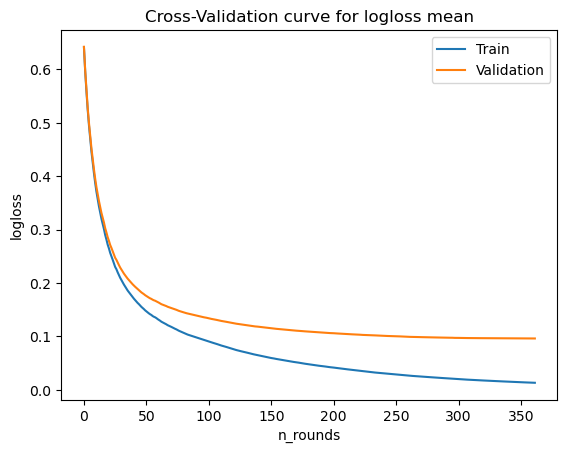

In [54]:
#Cross-validate your data. This step can be skipped if you have rich dataset but mostly done.

xgb_cv = cv(dtrain=dtrain,
            params = params,
           nfold=5,
           num_boost_round=5000,
           early_stopping_rounds=150,
           metrics='logloss',
           as_pandas=True,
           seed=0,
           verbose_eval=1
           )
print("------------------------------------------------------------#\n")
print("-------------------Finished Cross-Validation-------------------\n")
print("------------------------------------------------------------#\n")

#Save the plot of the cross-validation graph
#get train_log_loss-mean/std

tmean = xgb_cv['train-logloss-mean']
testmean = xgb_cv['test-logloss-mean']
plt.plot(tmean, label = "Train")
plt.plot(testmean, label="Validation")
plt.title("Cross-Validation curve for logloss mean")
plt.xlabel("n_rounds")
plt.ylabel("logloss")
plt.legend(loc="upper right")
plt.savefig("xgb_cv_plot.png", dpi=300)

## 5.) Train a model (1 hr)

We intend to train the data and finally test the data. Please note that XGBoost uses the results of the cross validation internally. 

Participants can play around with the num_boost_rounds and see what happens 

In [55]:
#Rerun training with the best hyperparameter combination
# print("Rerunning using the best trial params...")
# print("params = {}".format(params))
bst = xgb.train(params, dtrain,
        num_boost_round=10000,
	evals=[(dtrain, 'train'), (dvalid, 'valid_2021'), (dtest, 'test_2021')],
        #n_tree_limit = bst.best_iteration,
	early_stopping_rounds=150)
print("Finished Training...")


[0]	train-logloss:0.64237	valid_2021-logloss:0.63991	test_2021-logloss:0.64073
[1]	train-logloss:0.59735	valid_2021-logloss:0.59132	test_2021-logloss:0.59308
[2]	train-logloss:0.56027	valid_2021-logloss:0.55267	test_2021-logloss:0.55565
[3]	train-logloss:0.52501	valid_2021-logloss:0.51519	test_2021-logloss:0.51818
[4]	train-logloss:0.49776	valid_2021-logloss:0.48748	test_2021-logloss:0.49031
[5]	train-logloss:0.47145	valid_2021-logloss:0.45903	test_2021-logloss:0.46328
[6]	train-logloss:0.44671	valid_2021-logloss:0.43417	test_2021-logloss:0.43869
[7]	train-logloss:0.42605	valid_2021-logloss:0.41445	test_2021-logloss:0.41945
[8]	train-logloss:0.40824	valid_2021-logloss:0.39642	test_2021-logloss:0.40046
[9]	train-logloss:0.39065	valid_2021-logloss:0.37843	test_2021-logloss:0.38440
[10]	train-logloss:0.37479	valid_2021-logloss:0.36314	test_2021-logloss:0.36966
[11]	train-logloss:0.36121	valid_2021-logloss:0.34829	test_2021-logloss:0.35565
[12]	train-logloss:0.34649	valid_2021-logloss:0.33

[103]	train-logloss:0.09318	valid_2021-logloss:0.12200	test_2021-logloss:0.17864
[104]	train-logloss:0.09256	valid_2021-logloss:0.12088	test_2021-logloss:0.17896
[105]	train-logloss:0.09177	valid_2021-logloss:0.11968	test_2021-logloss:0.17855
[106]	train-logloss:0.09099	valid_2021-logloss:0.11894	test_2021-logloss:0.17835
[107]	train-logloss:0.09048	valid_2021-logloss:0.11870	test_2021-logloss:0.17790
[108]	train-logloss:0.09027	valid_2021-logloss:0.11857	test_2021-logloss:0.17776
[109]	train-logloss:0.08930	valid_2021-logloss:0.11765	test_2021-logloss:0.17749
[110]	train-logloss:0.08887	valid_2021-logloss:0.11738	test_2021-logloss:0.17774
[111]	train-logloss:0.08818	valid_2021-logloss:0.11638	test_2021-logloss:0.17756
[112]	train-logloss:0.08734	valid_2021-logloss:0.11555	test_2021-logloss:0.17702
[113]	train-logloss:0.08626	valid_2021-logloss:0.11416	test_2021-logloss:0.17659
[114]	train-logloss:0.08569	valid_2021-logloss:0.11331	test_2021-logloss:0.17643
[115]	train-logloss:0.08497	

[205]	train-logloss:0.04478	valid_2021-logloss:0.06375	test_2021-logloss:0.15802
[206]	train-logloss:0.04440	valid_2021-logloss:0.06357	test_2021-logloss:0.15797
[207]	train-logloss:0.04417	valid_2021-logloss:0.06335	test_2021-logloss:0.15815
[208]	train-logloss:0.04382	valid_2021-logloss:0.06286	test_2021-logloss:0.15794
[209]	train-logloss:0.04329	valid_2021-logloss:0.06219	test_2021-logloss:0.15703
[210]	train-logloss:0.04304	valid_2021-logloss:0.06152	test_2021-logloss:0.15707
[211]	train-logloss:0.04268	valid_2021-logloss:0.06110	test_2021-logloss:0.15726
[212]	train-logloss:0.04239	valid_2021-logloss:0.06058	test_2021-logloss:0.15730
[213]	train-logloss:0.04208	valid_2021-logloss:0.06016	test_2021-logloss:0.15729
[214]	train-logloss:0.04187	valid_2021-logloss:0.05991	test_2021-logloss:0.15711
[215]	train-logloss:0.04156	valid_2021-logloss:0.05969	test_2021-logloss:0.15725
[216]	train-logloss:0.04112	valid_2021-logloss:0.05899	test_2021-logloss:0.15689
[217]	train-logloss:0.04082	

[307]	train-logloss:0.02291	valid_2021-logloss:0.03480	test_2021-logloss:0.15324
[308]	train-logloss:0.02281	valid_2021-logloss:0.03448	test_2021-logloss:0.15331
[309]	train-logloss:0.02265	valid_2021-logloss:0.03420	test_2021-logloss:0.15324
[310]	train-logloss:0.02249	valid_2021-logloss:0.03407	test_2021-logloss:0.15340
[311]	train-logloss:0.02228	valid_2021-logloss:0.03369	test_2021-logloss:0.15282
[312]	train-logloss:0.02214	valid_2021-logloss:0.03349	test_2021-logloss:0.15250
[313]	train-logloss:0.02206	valid_2021-logloss:0.03331	test_2021-logloss:0.15219
[314]	train-logloss:0.02197	valid_2021-logloss:0.03319	test_2021-logloss:0.15207
[315]	train-logloss:0.02180	valid_2021-logloss:0.03299	test_2021-logloss:0.15242
[316]	train-logloss:0.02159	valid_2021-logloss:0.03269	test_2021-logloss:0.15255
[317]	train-logloss:0.02140	valid_2021-logloss:0.03243	test_2021-logloss:0.15293
[318]	train-logloss:0.02131	valid_2021-logloss:0.03221	test_2021-logloss:0.15270
[319]	train-logloss:0.02120	

[409]	train-logloss:0.01224	valid_2021-logloss:0.01952	test_2021-logloss:0.15371
[410]	train-logloss:0.01216	valid_2021-logloss:0.01944	test_2021-logloss:0.15356
[411]	train-logloss:0.01204	valid_2021-logloss:0.01929	test_2021-logloss:0.15369
[412]	train-logloss:0.01195	valid_2021-logloss:0.01911	test_2021-logloss:0.15390
[413]	train-logloss:0.01189	valid_2021-logloss:0.01901	test_2021-logloss:0.15406
[414]	train-logloss:0.01183	valid_2021-logloss:0.01892	test_2021-logloss:0.15378
[415]	train-logloss:0.01174	valid_2021-logloss:0.01881	test_2021-logloss:0.15388
[416]	train-logloss:0.01165	valid_2021-logloss:0.01867	test_2021-logloss:0.15437
[417]	train-logloss:0.01157	valid_2021-logloss:0.01855	test_2021-logloss:0.15417
[418]	train-logloss:0.01149	valid_2021-logloss:0.01848	test_2021-logloss:0.15376
[419]	train-logloss:0.01143	valid_2021-logloss:0.01844	test_2021-logloss:0.15386
[420]	train-logloss:0.01137	valid_2021-logloss:0.01832	test_2021-logloss:0.15395
[421]	train-logloss:0.01132	

In [56]:
#Do the prediction and check the accuracy of the model
print("Checking the acurracy of the model...\n")
preds = bst.predict(dtest)
labels = dtest.get_label()
print(
    "error=%f"
    % (
        sum(1 for i in range(len(preds)) if int(preds[i] > 0.5) != labels[i])
        / float(len(preds))
    )
)

#You can Save config and the model if you so wish
config = bst.save_config()
print(config)
bst.save_model('model1xgb.json')

Checking the acurracy of the model...

error=0.054954
{"learner":{"generic_param":{"device":"cpu","fail_on_invalid_gpu_id":"0","n_jobs":"0","nthread":"0","random_state":"0","seed":"0","seed_per_iteration":"0","validate_parameters":"1"},"gradient_booster":{"gbtree_model_param":{"num_parallel_tree":"1","num_trees":"454"},"gbtree_train_param":{"process_type":"default","tree_method":"hist","updater":"grow_quantile_histmaker","updater_seq":"grow_quantile_histmaker"},"name":"gbtree","specified_updater":false,"tree_train_param":{"alpha":"1.54920144e-05","cache_opt":"1","colsample_bylevel":"1","colsample_bynode":"1","colsample_bytree":"0.734165192","eta":"0.0996355861","gamma":"6.14048986e-05","grow_policy":"depthwise","interaction_constraints":"","lambda":"0.0028891929","learning_rate":"0.0996355861","max_bin":"256","max_cat_threshold":"64","max_cat_to_onehot":"4","max_delta_step":"0","max_depth":"6","max_leaves":"0","min_child_weight":"0","min_split_loss":"6.14048986e-05","monotone_constrain

## 6.) Analyze the results

In [57]:
#Load all the required libraries
#Please install libraries that your python environment doesn't seem to import!!
#using either pip or conda

from scipy.special import expit as sigmoid, logit as inverse_sigmoid #Extracting individual predicted values
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from collections import Counter 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from xgboost import cv
import xgboost as xgb
import os
import shap #Explainable model

#Define the path
path=os.getcwd()

## 7.) Visualize the results using SHAP

SHAP is a library that is popular for explaining AI results. More details can be obtained from the wonderful documentation pages here: https://shap.readthedocs.io/en/latest/index.html 

Basically SHAP uses a game theory concept to rank important features impacting the model. 


### Model one SHAP Analysis (No Wild birds used as features)

For data manipulation purposes, you will need the model as well as the training and test data sets. 



In [72]:
#Load the model
bst1 = xgb.Booster({'nthread': 4}) #init model
bst1.load_model('model1xgb.json')


In [73]:
#Load Train and Test files
# train_df = pd.read_excel("m1train.xlsx")
# test_df = pd.read_excel(".m1test.xlsx")
X_train = train_df.iloc[:,3:] #Training
y_train = train_df.iloc[:,2:3]

#Test (I use these raw values for testing the prediction accuracy) May not be necessary in some cases!!
X_test = test_df.iloc[:,3:]
X_test_raw = test_df.iloc[:,3:]
y_test = test_df.iloc[:,2:3]
y_test_raw = test_df.iloc[:,2:3]

print("\nDone Loading Data Files.........\n")


Done Loading Data Files.........



C:\Users\Administrator\AppData\Local\Temp\ipykernel_14256\763032187.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


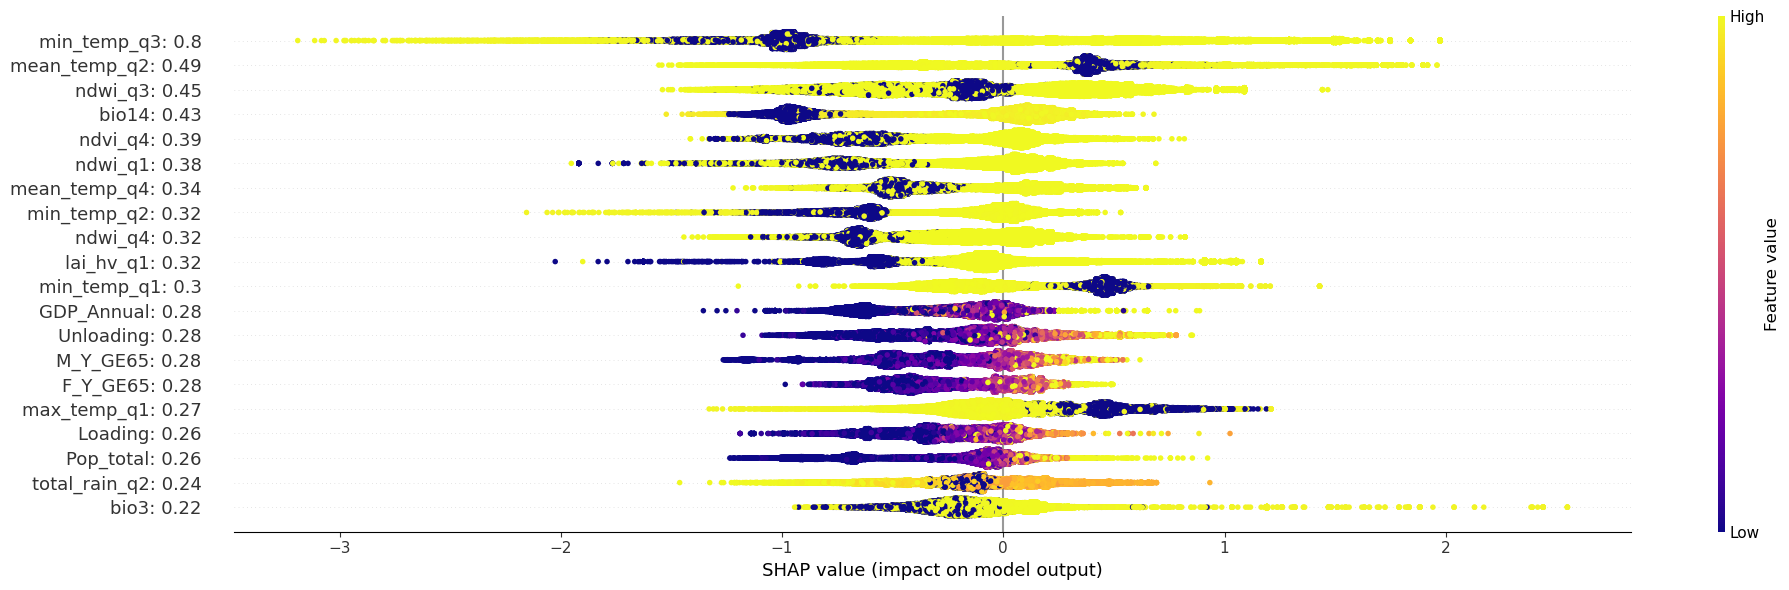

In [74]:
#Run SHAP model and plot the beeswarm SHAP image. 
#Participants can explore other plots if they so wish


explainer = shap.TreeExplainer(bst1)
shap_values = explainer.shap_values(X_train)
#print(shap_values)
feature_names = [a + ": " + str(b) for a,b in zip(X_train.columns, np.abs(shap_values).mean(0).round(2))]
shap.summary_plot(shap_values, 
                  features=X_train, 
                #cmap = plt.get_cmap("summer"),
                  cmap = plt.get_cmap("plasma"),
                  feature_names=feature_names,
                  show=False
                )
plt.gcf().set_size_inches(20,6)
plt.tight_layout()
plt.show()

# COFFEE BREAK (10 mins)

## Exercise (45 mins)
### Run the same model using a separate data

Background

In the first model, we used domestic poultry, wild birds, and mammals to fit the model

In the next step, you are required to use the wild bird as features. 
Because of time the data has already been prepared for you.

You are required to write a simple scripts that fit the data using the parameters below and plot a SHAP 
beeswarm graph.

You are free to modify the cells above (By copy pasting into new cells). Please be aware that they may not necessarily the same!!!
Questions:

    1.) Do you notice any difference between the first model and the second model?
    2.) Can you comment on the logloss difference?
    3.) Generate similar SHAP plots for the new model.   

In [ ]:
#Parameters for the second model
base_params = {
	'verbosity': 0,
	'booster': 'gbtree',
	'objective': 'binary:logistic',
        'scale_pos_weight' : ratio,
        'max_delta_step': 1,
        'tree_method': 'gpu_hist',
        'eval_metrics': 'logloss'
}
params = {
          'learning_rate': 0.09813841335627332, 
          'num_boost_round': 281.7702180112571, 
          'max-depth': 2, 'gamma': 3.8914577758283693e-05, 
          'subsample': 0.7341873457611429, 
          'reg_alpha': 0.22771113527284387, 
          'reg_lambda': 1.6884029915870075e-07, 
          'colsample_bytree': 0.850855026540212, 
          'min_child_weight': 3, 
          'n_estimators': 473
        }

### The data for this section will be provided on the day of the exercise

# Q & A